In [148]:
from sklearn import datasets
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn import metrics
import seaborn as sns

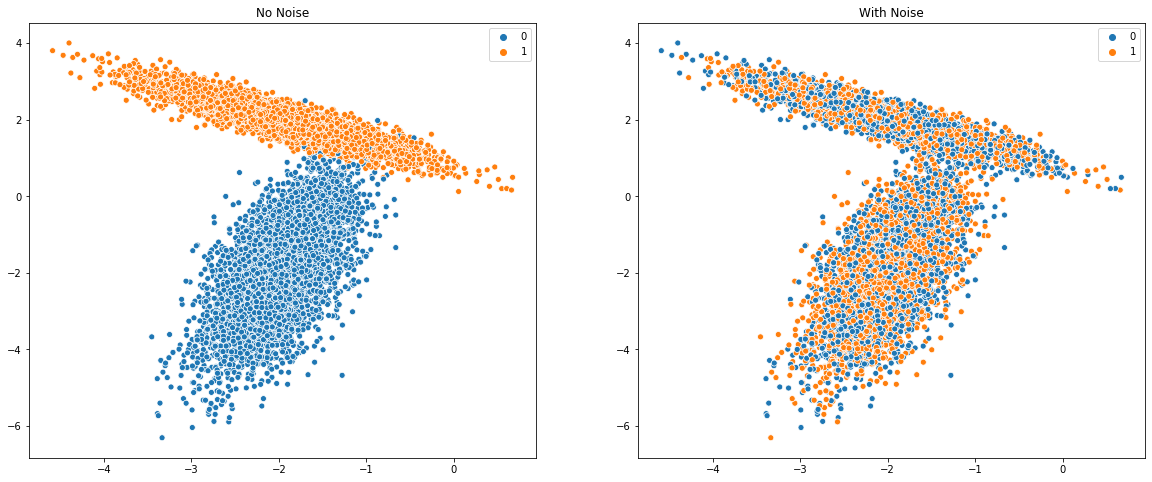

In [149]:
X,Y = make_classification(n_samples=10000, 
                          n_features=2, 
                          n_informative=2, 
                          n_redundant=0, 
                          n_repeated=0, 
                          n_classes=2, 
                          n_clusters_per_class=1,
                          class_sep=2,
                          flip_y=0,
                          weights=[0.5,0.5], 
                          random_state=17)

f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=Y,ax=ax1);
ax1.set_title("No Noise");

X1,Y1 = make_classification(n_samples=10000, 
                          n_features=2, 
                          n_informative=2, 
                          n_redundant=0, 
                          n_repeated=0, 
                          n_classes=2, 
                          n_clusters_per_class=1,
                          class_sep=2,
                          flip_y=1,
                          weights=[0.5,0.5], 
                          random_state=17)
sns.scatterplot(X1[:,0],X1[:,1],hue=Y1,ax=ax2);
ax2.set_title("With Noise");


plt.show();

In [150]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

In [151]:
clf.fit(X)
sim_mat = clf.transform()
#plt.imshow(sim_mat)

clf.fit(X1)
sim_mat1 = clf.transform()
#plt.imshow(sim_mat)

A_KMeans = []
I = []
A_Agglomerative = []
A_Spectral = []

A_KMeans1 = []
A_Agglomerative1 = []
A_Spectral1 = []


In [ ]:
for i in range (1,31):
    I.append(i)
    cluster_K = KMeans(n_clusters=i)
    predict_labels_K = cluster_K.fit_predict(sim_mat)
    A_KMeans.append(adjusted_rand_score(Y, predict_labels_K))

for i in range (1,31):
    cluster_K = KMeans(n_clusters=i)
    predict_labels_K = cluster_K.fit_predict(sim_mat1)
    A_KMeans1.append(adjusted_rand_score(Y, predict_labels_K))


f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.lineplot(I,A_KMeans,ax=ax1);
ax1.set_title("No Noise");
ax1.set_ylabel('Adjusted Rand Index')
ax1.set_xlabel('Number of Clusters')

sns.lineplot(I,A_KMeans1,ax=ax2);
ax2.set_title("With Noise");
ax2.set_ylabel('Adjusted Rand Index')
ax2.set_xlabel('Number of Clusters')

In [ ]:
for i in range (1,31):
    cluster_A = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    predict_labels_A = cluster_A.fit_predict(sim_mat)
    A_Agglomerative.append(adjusted_rand_score(Y, predict_labels_A))

for i in range (1,31):
    cluster_A = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    predict_labels_A = cluster_A.fit_predict(sim_mat1)
    A_Agglomerative1.append(adjusted_rand_score(Y, predict_labels_A))
    
max_A_Agglomerative = max(A_Agglomerative)
print(max_A_Agglomerative)

f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.lineplot(I,A_Agglomerative,ax=ax1);
ax1.set_title("No Noise");
ax1.set_ylabel('Adjusted Rand Index')
ax1.set_xlabel('Number of Clusters')

sns.lineplot(I,A_Agglomerative1,ax=ax2);
ax2.set_title("With Noise");
ax2.set_ylabel('Adjusted Rand Index')
ax2.set_xlabel('Number of Clusters')


In [ ]:
for i in range (1,31):
    cluster_S=SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
    degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
    kernel_params=None, n_clusters=i, n_init=10, n_jobs=None,
    n_neighbors=10, random_state=0)
    predict_labels_S = cluster_S.fit_predict(sim_mat)
    A_Spectral.append(adjusted_rand_score(Y, predict_labels_S))

for i in range (1,31):
    cluster_S=SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
    degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
    kernel_params=None, n_clusters=i, n_init=10, n_jobs=None,
    n_neighbors=10, random_state=0)
    predict_labels_S = cluster_S.fit_predict(sim_mat1)
    A_Spectral1.append(adjusted_rand_score(Y, predict_labels_S))
    
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.lineplot(I,A_Spectral,ax=ax1);
ax1.set_title("No Noise");
ax1.set_ylabel('Adjusted Rand Index')
ax1.set_xlabel('Number of Clusters')

sns.lineplot(I,A_Spectral1,ax=ax2);
ax2.set_title("With Noise");
ax2.set_ylabel('Adjusted Rand Index')
ax2.set_xlabel('Number of Clusters')

max_A_Agglomerative = max(A_Agglomerative)
print(max_A_Agglomerative)

In [ ]:
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.lineplot(I,A_KMeans,ax=ax1,label='K-Means')
sns.lineplot(I,A_Agglomerative,ax=ax1,label='Agglomerative')
sns.lineplot(I,A_Spectral,ax=ax1,label='Spectral')
# plt.plot(I,A_KMeans,label='K-Means'),
# plt.plot(I,A_Agglomerative,label='Agglomerative')
# plt.plot(I,A_Spectral,label='Spectral')
# plt.plot
# plt.xlabel('Number of Clusters')
# plt.ylabel('Adjusted Rand Score')
plt.title('Comparing the change in Adjusted Rand Score with Number of Clusters')
#plt.legend()


#sns.lineplot(I,A_Spectral,ax=ax1);
ax1.set_title("No Noise");
ax1.set_ylabel('Adjusted Rand Index')
ax1.set_xlabel('Number of Clusters')

sns.lineplot(I,A_KMeans1,ax=ax2,label='K-Means');
sns.lineplot(I,A_Agglomerative1,ax=ax2,label='Agglomerative');
sns.lineplot(I,A_Spectral1,ax=ax2,label='Spectral');
ax2.set_title("With Noise");
ax2.set_ylabel('Adjusted Rand Index')
ax2.set_xlabel('Number of Clusters')
